In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
import xlrd
import csv
from matplotlib.pyplot import figure,plot,title,legend,xlabel,ylabel,show
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('kidney_disease.csv')
N,M=df.shape
print('The original dataset has ',N,'rows and',M,' columns')
names=list(df.columns)

FileNotFoundError: [Errno 2] File b'kidney_disease.csv' does not exist: b'kidney_disease.csv'

# 1.Basic statistics

1.1 data cleaning and pre processing

In [4]:
missvalues=df.isnull().sum()
misscols=(missvalues!=0).sum()
missrows=df.isnull().any(axis=1).sum()
print('There are', misscols,'columns and',missrows,'rows with missing values.')

There are 24 columns and 242 rows with missing values.


In [5]:
missvalues

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

So we made a visual distribution of missing values in the whole dataset

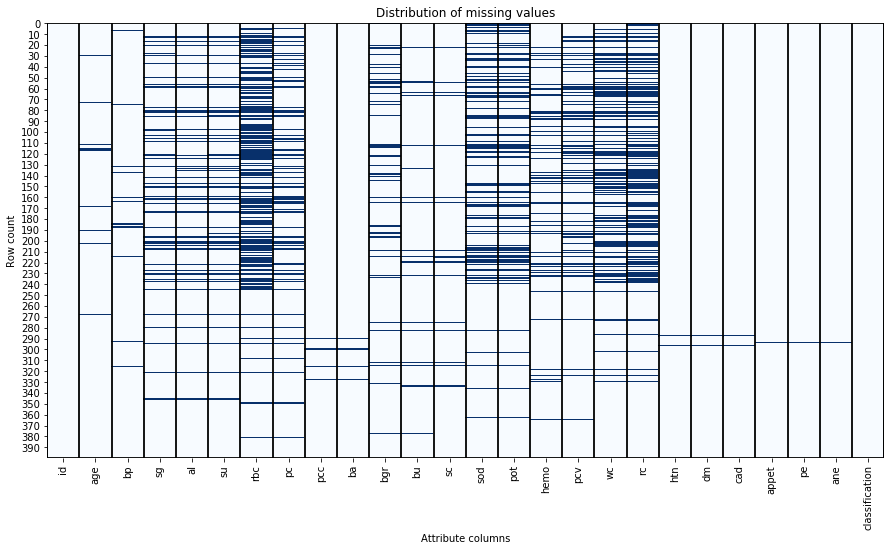

In [6]:
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(df.isnull(),ax=ax,cbar=False,cmap="Blues")
ax.vlines(range(M),*ax.get_ylim(),linewidths=1.8,color='black')
ax.axhline(y=0,color='k',linewidth=1.8)
ax.axhline(y=(N-0),color='k',linewidth=1.8)
ax.axvline(x=0, color='k',linewidth=1.8)
ax.axvline(x=M, color='k',linewidth=2)
plt.title('Distribution of missing values')
plt.xlabel('Attribute columns')
plt.ylabel('Row count')
plt.show()

So here we can see the attributes like 

Our decision is to delete all the rows that contain missing values,even some attributes like rbc-red blood cells, sod-sodium or pot-potassium are the most missing values, we will not delete those attributes, because before PCA analysis, we can not gurantee they are useless factors. 

In [7]:
df=df.dropna().reset_index(drop=True)

In [8]:
r,c=df.shape

In [9]:
print('The cleaned dataset has ',r,'rows and ',c,'columns.' )

The cleaned dataset has  158 rows and  26 columns.


In [10]:
attributeNames=df.columns.values

In [11]:
attributeNames

array(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba',
       'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn',
       'dm', 'cad', 'appet', 'pe', 'ane', 'classification'], dtype=object)

In [12]:
focus_attr = set(['classification','age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'])

In [13]:
k = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'wc', 'rc','pcv']

In [14]:
outlier=df[k]

In [15]:
outlier

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,wc,rc,pcv
0,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,6700,3.9,32
1,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,12100,3.7,29
2,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,4500,3.8,32
3,68.0,80.0,1.010,3.0,2.0,157.0,90.0,4.1,130.0,6.4,5.6,11000,2.6,16
4,61.0,80.0,1.015,2.0,0.0,173.0,148.0,3.9,135.0,5.2,7.7,9200,3.2,24
5,48.0,80.0,1.025,4.0,0.0,95.0,163.0,7.7,136.0,3.8,9.8,6900,3.4,32
6,69.0,70.0,1.010,3.0,4.0,264.0,87.0,2.7,130.0,4.0,12.5,9600,4.1,37
7,73.0,70.0,1.005,0.0,0.0,70.0,32.0,0.9,125.0,4.0,10.0,18900,3.5,29
8,73.0,80.0,1.020,2.0,0.0,253.0,142.0,4.6,138.0,5.8,10.5,7200,4.3,33
9,46.0,60.0,1.010,1.0,0.0,163.0,92.0,3.3,141.0,4.0,9.8,14600,3.2,28


In [16]:
outlier.wc=outlier.wc.str.replace("\t",'')

In [17]:
outlier.wc=outlier.wc.str.replace( " ",'')

In [18]:
outlier.pcv=outlier.pcv.str.replace('?','')

In [19]:
outlier.pcv=outlier.pcv.str.replace( " ",'')

In [20]:
outlier.rc=outlier.rc.str.replace('?','')

In [21]:
outlier.rc=outlier.rc.str.replace(" ",'')

In [22]:
k1 = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [23]:
outlier1=outlier[k1]

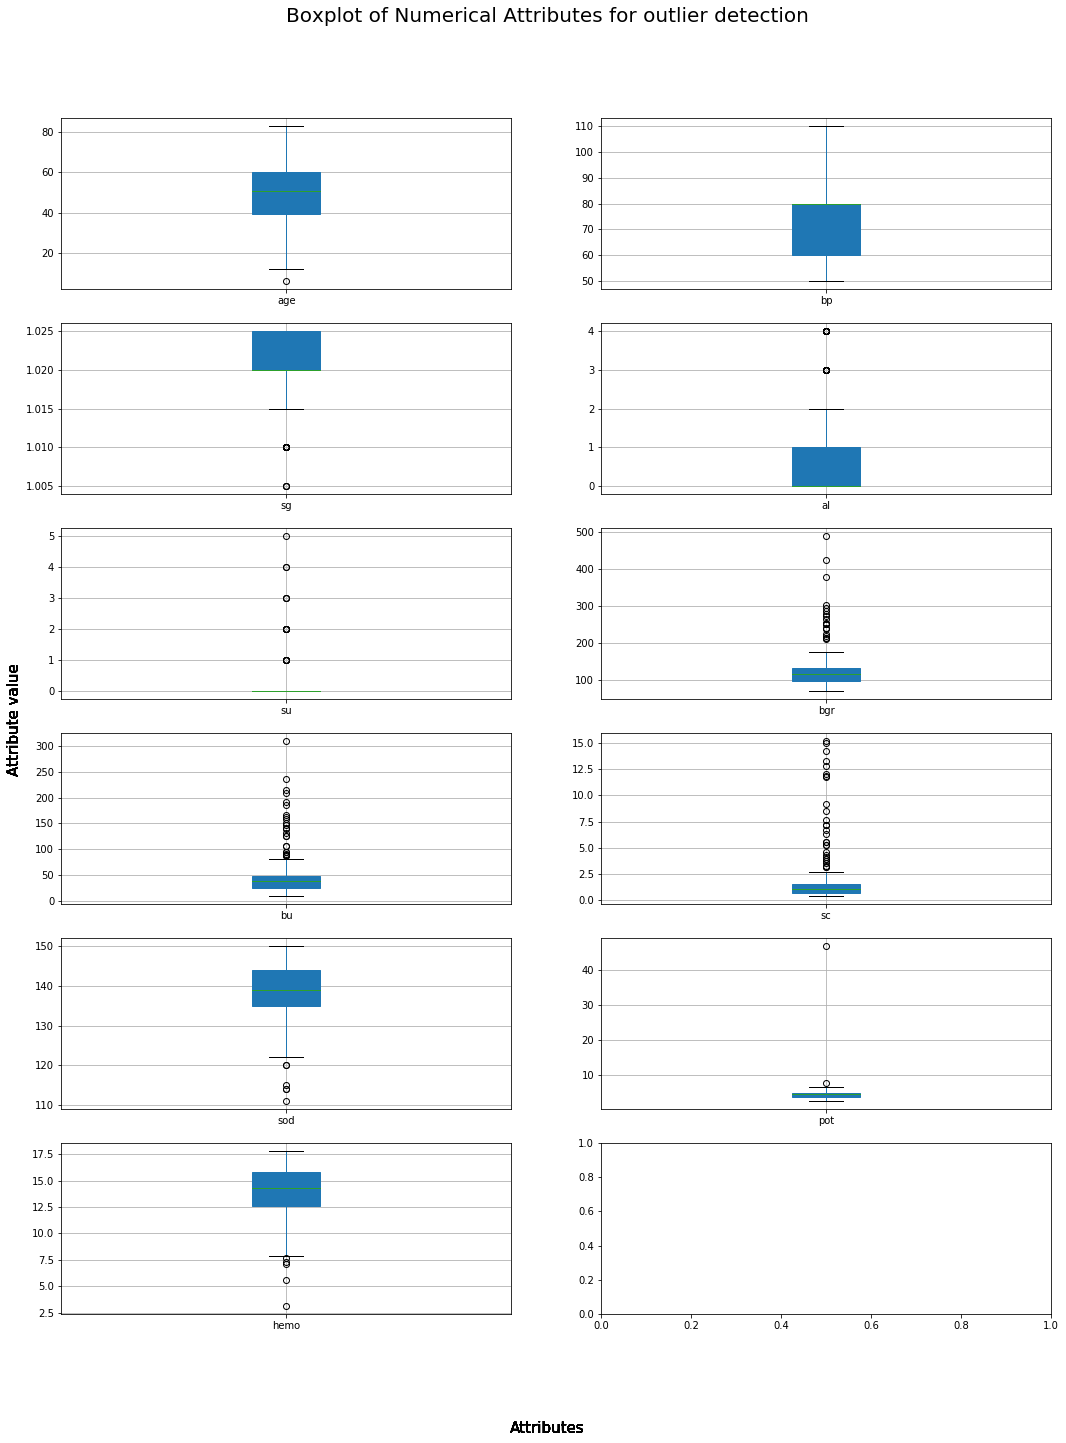

In [24]:
fig, axes = plt.subplots(6,2,figsize=(10,22))
for i,el in enumerate(list(outlier1.columns.values)):
    a = outlier1.boxplot(el, patch_artist=True, ax=axes.flatten()[i]) 
    fig.text(0.8, 0.05, 'Attributes', ha='center', fontsize=15)
    fig.text(0.05, 0.5, 'Attribute value', va='center', rotation='vertical', fontsize=15)
plt.subplots_adjust(right=1.5) 
plt.suptitle('Boxplot of Numerical Attributes for outlier detection', x=0.8 , y=0.95, fontsize=20)
plt.show()

In [25]:
data=pd.DataFrame(df,columns=focus_attr)

In [26]:
#data=data[data['sg']>1.015]

In [27]:
data=data[data['age']>=20]

In [28]:
#data=data[data['bu']<250]

In [28]:
#data=data[data['sod']>125]

In [29]:
data=data[data['pot']<30]

In [30]:
#data=data[data['hemo']>10]

In [31]:
data=data.reset_index(drop=True)

In [32]:
data

,sod,sg,su,bgr,sc,hemo,pot,classification,age,al,bp,bu
0,111.0,1.005,0.0,117.0,3.8,11.2,2.5,ckd,48.0,4.0,70.0,56.0
1,114.0,1.020,0.0,70.0,7.2,9.5,3.7,ckd,53.0,2.0,90.0,107.0
2,131.0,1.010,0.0,380.0,2.7,10.8,4.2,ckd,63.0,3.0,70.0,60.0
3,130.0,1.010,2.0,157.0,4.1,5.6,6.4,ckd,68.0,3.0,80.0,90.0
4,135.0,1.015,0.0,173.0,3.9,7.7,5.2,ckd,61.0,2.0,80.0,148.0
5,136.0,1.025,0.0,95.0,7.7,9.8,3.8,ckd,48.0,4.0,80.0,163.0
6,130.0,1.010,4.0,264.0,2.7,12.5,4.0,ckd,69.0,3.0,70.0,87.0
7,125.0,1.005,0.0,70.0,0.9,10.0,4.0,ckd,73.0,0.0,70.0,32.0
8,138.0,1.020,0.0,253.0,4.6,10.5,5.8,ckd,73.0,2.0,80.0,142.0
9,141.0,1.010,0.0,163.0,3.3,9.8,4.0,ckd,46.0,1.0,60.0,92.0


In [33]:
classLabels=data.classification.tolist()

In [34]:
classLabels

['ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'ckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 'notckd',
 

In [35]:
classNames=sorted(set(classLabels))

In [36]:
classNames

['ckd', 'notckd']

In [37]:
classDict=dict(zip(classNames,range(2)))

In [38]:
classDict

{'ckd': 0, 'notckd': 1}

In [39]:
y=np.asarray([classDict[value] for value in classLabels])

In [40]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
focus_attr1 = set(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'])

In [42]:
data1=pd.DataFrame(data,columns=focus_attr1)

In [43]:
data1

,sod,sg,su,bgr,sc,hemo,pot,age,al,bp,bu
0,111.0,1.005,0.0,117.0,3.8,11.2,2.5,48.0,4.0,70.0,56.0
1,114.0,1.020,0.0,70.0,7.2,9.5,3.7,53.0,2.0,90.0,107.0
2,131.0,1.010,0.0,380.0,2.7,10.8,4.2,63.0,3.0,70.0,60.0
3,130.0,1.010,2.0,157.0,4.1,5.6,6.4,68.0,3.0,80.0,90.0
4,135.0,1.015,0.0,173.0,3.9,7.7,5.2,61.0,2.0,80.0,148.0
5,136.0,1.025,0.0,95.0,7.7,9.8,3.8,48.0,4.0,80.0,163.0
6,130.0,1.010,4.0,264.0,2.7,12.5,4.0,69.0,3.0,70.0,87.0
7,125.0,1.005,0.0,70.0,0.9,10.0,4.0,73.0,0.0,70.0,32.0
8,138.0,1.020,0.0,253.0,4.6,10.5,5.8,73.0,2.0,80.0,142.0
9,141.0,1.010,0.0,163.0,3.3,9.8,4.0,46.0,1.0,60.0,92.0


In [44]:
X=data1.to_numpy()

In [45]:
X

array([[111.   ,   1.005,   0.   , ...,   4.   ,  70.   ,  56.   ],
       [114.   ,   1.02 ,   0.   , ...,   2.   ,  90.   , 107.   ],
       [131.   ,   1.01 ,   0.   , ...,   3.   ,  70.   ,  60.   ],
       ...,
       [150.   ,   1.02 ,   0.   , ...,   0.   ,  80.   ,  49.   ],
       [141.   ,   1.025,   0.   , ...,   0.   ,  70.   ,  31.   ],
       [141.   ,   1.025,   0.   , ...,   0.   ,  80.   ,  18.   ]])

In [46]:
a,b=X.shape

In [47]:
print(a)
print(b)

153
11


In [48]:
N=len(y)
print(N)

153


In [49]:
M=len(focus_attr1)
print(M)

11


In [50]:
C=len(classNames)
print(C)

2


In [51]:
i=1

In [52]:
j=2

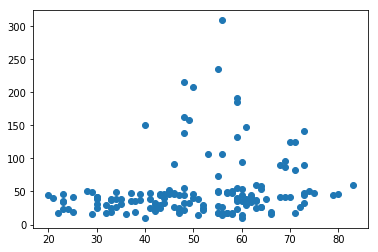

In [119]:
plot(X[:,7],X[:,10],'o')       #age and bu

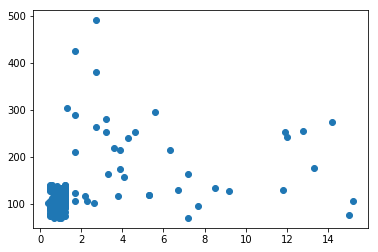

In [120]:
plot(X[:,4],X[:,3],'o')         #sc and bgr

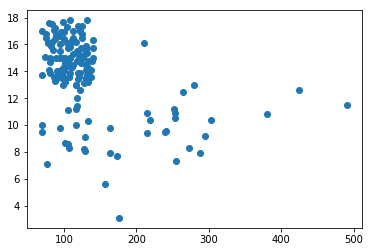

In [56]:
plot(X[:,3],X[:,5],'o')

In [57]:
attributes=list(focus_attr1)

In [58]:
attributes

['sod', 'sg', 'su', 'bgr', 'sc', 'hemo', 'pot', 'age', 'al', 'bp', 'bu']

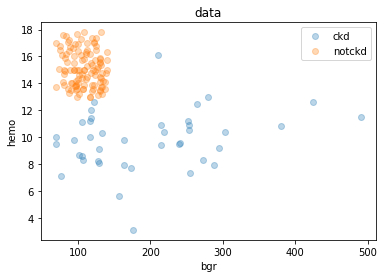

In [122]:
f=figure()
title('data')

for c in range(C):
    class_mask=y==c
    plot(X[class_mask,3],X[class_mask,5],'o',alpha=.3)
    
legend(classNames)
xlabel(attributes[3])
ylabel(attributes[5])
    
show()

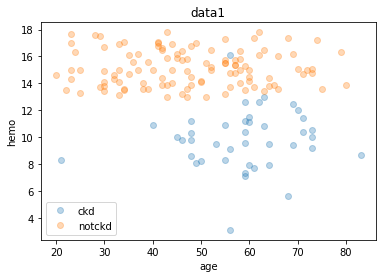

In [125]:
f1=figure()
title('data1')

for c in range(C):
    class_mask=y==c
    plot(X[class_mask,7],X[class_mask,5],'o',alpha=.3)
    
legend(classNames)
xlabel(attributes[7])
ylabel(attributes[5])
    
show()

In [126]:
X=np.array(X)

In [127]:
Y=X-np.ones((153,1))*X.mean(axis=0)

In [128]:
Y

array([[-2.79673203e+01, -1.49019608e-02, -2.41830065e-01, ...,
         3.22875817e+00, -4.05228758e+00,  3.83660131e+00],
       [-2.49673203e+01,  9.80392157e-05, -2.41830065e-01, ...,
         1.22875817e+00,  1.59477124e+01,  5.48366013e+01],
       [-7.96732026e+00, -9.90196078e-03, -2.41830065e-01, ...,
         2.22875817e+00, -4.05228758e+00,  7.83660131e+00],
       ...,
       [ 1.10326797e+01,  9.80392157e-05, -2.41830065e-01, ...,
        -7.71241830e-01,  5.94771242e+00, -3.16339869e+00],
       [ 2.03267974e+00,  5.09803922e-03, -2.41830065e-01, ...,
        -7.71241830e-01, -4.05228758e+00, -2.11633987e+01],
       [ 2.03267974e+00,  5.09803922e-03, -2.41830065e-01, ...,
        -7.71241830e-01,  5.94771242e+00, -3.41633987e+01]])

In [129]:
X.mean(axis=0)

array([138.96732026,   1.01990196,   0.24183007, 131.54901961,
         2.20065359,  13.71176471,   4.3627451 ,  50.51633987,
         0.77124183,  74.05228758,  52.16339869])

In [130]:
Z=np.ones((153,1))*X.mean(axis=0)

In [131]:
Z

array([[138.96732026,   1.01990196,   0.24183007, ...,   0.77124183,
         74.05228758,  52.16339869],
       [138.96732026,   1.01990196,   0.24183007, ...,   0.77124183,
         74.05228758,  52.16339869],
       [138.96732026,   1.01990196,   0.24183007, ...,   0.77124183,
         74.05228758,  52.16339869],
       ...,
       [138.96732026,   1.01990196,   0.24183007, ...,   0.77124183,
         74.05228758,  52.16339869],
       [138.96732026,   1.01990196,   0.24183007, ...,   0.77124183,
         74.05228758,  52.16339869],
       [138.96732026,   1.01990196,   0.24183007, ...,   0.77124183,
         74.05228758,  52.16339869]])

In [132]:
U,S,V=svd(Y,full_matrices=False)

In [133]:
U

array([[ 0.01304966,  0.02003342,  0.00861528, ..., -0.23610386,
         0.08092368,  0.16658689],
       [ 0.04081319,  0.14386281, -0.02111719, ...,  0.00615961,
        -0.05629903, -0.12152496],
       [-0.27656975, -0.16133089,  0.013884  , ...,  0.03978243,
         0.37216611,  0.00529447],
       ...,
       [-0.00783135, -0.01226643, -0.02192323, ...,  0.02712027,
         0.04600221,  0.06930541],
       [ 0.07223847,  0.00229551,  0.02501271, ..., -0.08938612,
        -0.03636624, -0.04282875],
       [ 0.01486726, -0.05832297, -0.04883216, ..., -0.0279739 ,
         0.0261453 , -0.07740439]])

In [134]:
S

array([8.44638719e+02, 5.32352631e+02, 1.69677914e+02, 1.29800465e+02,
       8.01873793e+01, 2.29658376e+01, 1.50295626e+01, 9.03903166e+00,
       8.57817686e+00, 6.23154596e+00, 4.23805801e-02])

In [135]:
V

array([[ 4.29807226e-02,  5.09820264e-05, -8.35900252e-03,
        -9.23929938e-01, -2.36769151e-02,  2.37072375e-02,
        -3.72856319e-04, -6.93074434e-02, -1.29475630e-02,
        -4.01707956e-02, -3.69768346e-01],
       [-6.18292722e-02, -3.12106504e-05, -2.42400806e-03,
        -3.76833796e-01,  5.32431877e-02, -3.17328144e-02,
         5.29948310e-03,  1.08667849e-02,  1.20624499e-02,
         6.01629472e-02,  9.20007876e-01],
       [ 1.33710738e-03,  4.13373601e-05,  1.44871334e-03,
         5.96060083e-02,  4.70042209e-03,  1.43585997e-02,
         1.93810686e-03, -9.96190507e-01, -8.39386586e-03,
         5.13863966e-02,  3.32365933e-02],
       [ 6.85798150e-02,  7.40367861e-06, -6.02622405e-03,
         1.91509976e-02, -2.70202428e-02,  1.67265417e-02,
        -1.58429446e-04, -4.70438291e-02, -1.55419628e-02,
        -9.92467011e-01,  8.02396057e-02],
       [-9.85021212e-01, -2.18176401e-04,  5.64275408e-05,
        -1.64869863e-02,  4.03692386e-02, -1.10892407e-01,
  

In [136]:
rho=(S*S)/(S*S).sum()

In [137]:
rho

array([6.79552401e-01, 2.69947798e-01, 2.74240512e-02, 1.60484641e-02,
       6.12481561e-03, 5.02395286e-04, 2.15166007e-04, 7.78260151e-05,
       7.00924064e-05, 3.69889994e-05, 1.71086118e-09])

In [138]:
(S*S).sum()

1049830.1015669936

In [139]:
threshold=0.9

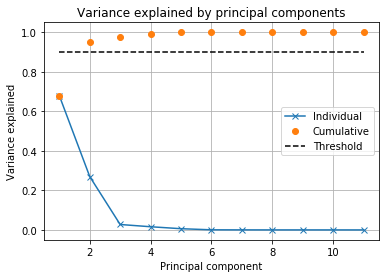

In [140]:
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o')
plt.plot([1,len(rho)],[threshold,threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

In [141]:
U,S,Vh=svd(Y,full_matrices=False)

In [142]:
V=Vh.T

In [143]:
Z=Y@V

In [144]:
Z

array([[ 1.10222462e+01,  1.06648442e+01,  1.46182196e+00, ...,
        -2.02534070e+00,  5.04279607e-01,  7.06004917e-03],
       [ 3.44724014e+01,  7.65857459e+01, -3.58312156e+00, ...,
         5.28382583e-02, -3.50829966e-01, -5.15029835e-03],
       [-2.33601522e+02, -8.58849243e+01,  2.35580799e+00, ...,
         3.41260759e-01,  2.31917020e+00,  2.24382528e-04],
       ...,
       [-6.61466326e+00, -6.53006463e+00, -3.71988856e+00, ...,
         2.32642441e-01,  2.86664901e-01,  2.93720340e-03],
       [ 6.10154053e+01,  1.22202068e+00,  4.24410492e+00, ...,
        -7.66769931e-01, -2.26617896e-01, -1.81510727e-03],
       [ 1.25574629e+01, -3.10483876e+01, -8.28573954e+00, ...,
        -2.39965035e-01,  1.62925622e-01, -3.28044309e-03]])

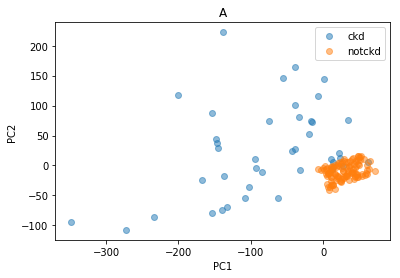

In [145]:
f=figure()
title('A')
for c in range(C):
    class_mask = y==c
    plot(Z[class_mask,0],Z[class_mask,1],'o',alpha=.5)
legend(classNames)
xlabel('PC{0}'.format(1))
ylabel('PC{0}'.format(2))
show()

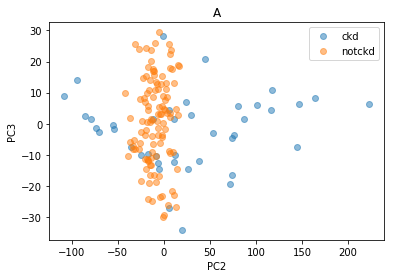

In [146]:
f=figure()
title('A')
for c in range(C):
    class_mask = y==c
    plot(Z[class_mask,1],Z[class_mask,2],'o',alpha=.5)
legend(classNames)
xlabel('PC{0}'.format(2))
ylabel('PC{0}'.format(3))
show()

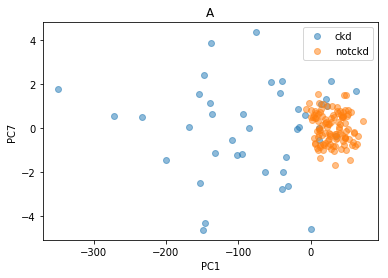

In [147]:
f=figure()
title('A')
for c in range(C):
    class_mask = y==c
    plot(Z[class_mask,0],Z[class_mask,6],'o',alpha=.5)
legend(classNames)
xlabel('PC{0}'.format(1))
ylabel('PC{0}'.format(7))
show()

In [148]:
N,M=X.shape

In [149]:
pcs=[0,1,2]

In [150]:
legendStrs=['PC'+str(e+1) for e in pcs]

In [151]:
legendStrs

['PC1', 'PC2', 'PC3']

In [152]:
c =['r','g','b']

In [153]:
bw=.2

In [154]:
r=np.arange(1,M+1)

In [155]:
r

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

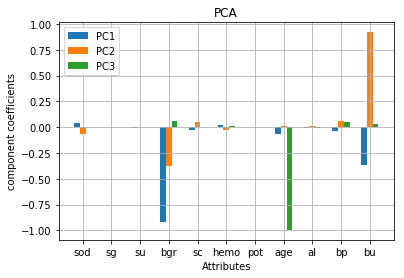

In [156]:
for i in pcs:
    plt.bar(r+i*bw,V[:,i],width=bw)
plt.xticks(r+bw,attributes)
plt.xlabel('Attributes')
plt.ylabel('component coefficients')
plt.legend(legendStrs)
plt.grid()
plt.title('PCA')
plt.show()

In [157]:
print('PC2:')
print(V[:,1].T)

PC2:
[-6.18292722e-02 -3.12106504e-05 -2.42400806e-03 -3.76833796e-01
  5.32431877e-02 -3.17328144e-02  5.29948310e-03  1.08667849e-02
  1.20624499e-02  6.01629472e-02  9.20007876e-01]


In [158]:
print(V[:,7].T)

[ 2.69474487e-03  3.07812968e-04 -2.36557870e-01  3.78583173e-03
  2.08314250e-01 -1.62749696e-01 -6.47973446e-01  2.97768676e-03
 -6.73964336e-01  3.45400447e-03 -4.25274759e-03]


In [159]:
all_ncdk_data=Y[y==1,:]

In [160]:
all_ncdk_data

array([[-3.96732026e+00,  5.09803922e-03, -2.41830065e-01, ...,
        -7.71241830e-01,  5.94771242e+00, -4.21633987e+01],
       [ 1.10326797e+01,  5.09803922e-03, -2.41830065e-01, ...,
        -7.71241830e-01,  5.94771242e+00, -1.61633987e+01],
       [ 8.03267974e+00,  5.09803922e-03, -2.41830065e-01, ...,
        -7.71241830e-01,  5.94771242e+00, -3.16339869e+00],
       ...,
       [ 1.10326797e+01,  9.80392157e-05, -2.41830065e-01, ...,
        -7.71241830e-01,  5.94771242e+00, -3.16339869e+00],
       [ 2.03267974e+00,  5.09803922e-03, -2.41830065e-01, ...,
        -7.71241830e-01, -4.05228758e+00, -2.11633987e+01],
       [ 2.03267974e+00,  5.09803922e-03, -2.41830065e-01, ...,
        -7.71241830e-01,  5.94771242e+00, -3.41633987e+01]])

In [161]:
print(all_ncdk_data[0,:])

[-3.96732026e+00  5.09803922e-03 -2.41830065e-01  8.45098039e+00
 -1.00065359e+00  1.28823529e+00  6.37254902e-01 -1.05163399e+01
 -7.71241830e-01  5.94771242e+00 -4.21633987e+01]


In [162]:
print(all_ncdk_data[0,:]@V[:,1])

-41.58592148223553


In [163]:
print(all_ncdk_data[:,:]@V[:,0])

[ 8.1679971  65.10435214 47.53996585 23.81351559 35.69918591 20.20649522
 15.57472584 44.75723355 43.34271467 34.03695453  7.32254201 16.25981264
 24.51617575 15.87459788 10.45691792 36.750997   10.96491788 16.19382769
 23.7352648  27.68170425 44.34248985  6.12942477 16.96566933 10.9720473
 22.00391644  5.13167668  2.10457329 13.08623878 35.97288305 45.97652914
 58.40705945 44.10988568 10.11090581 44.37771008 12.27761554 40.20348446
  5.30837387 41.41053048  9.35636732 19.37110123 11.24793135  9.29832588
 49.14844613 37.64891163 12.78321547 34.09660209  4.10095921 28.55249521
 18.72250549 26.37118632 25.52331593 10.17155722 29.27868221 31.86089322
 20.99435011 59.80495     6.26103911 34.28093785  0.35655693 41.78937939
  5.75241128 45.8408977  39.34258766  6.84507024 37.10518404 26.76734992
 33.07854894 47.08342987 33.24066566 43.35953574 47.41234761 24.40002368
 49.57491837 42.57217094 46.98900765 48.05358286 35.22339257 25.38151605
 40.45119808 30.94208784 71.4973848  52.83485512 13.

Text(0.5, 1.0, 'NanoNose: attribute standard deviations')

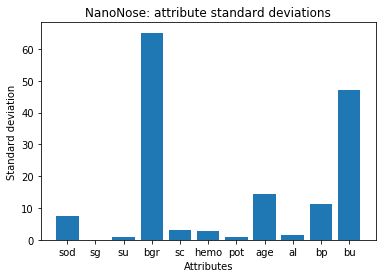

In [164]:
r = np.arange(1,X.shape[1]+1)
plt.bar(r, np.std(X,0))
plt.xticks(r, attributes)
plt.ylabel('Standard deviation')
plt.xlabel('Attributes')
plt.title('NanoNose: attribute standard deviations')

In [165]:
X_s = X.copy()
X_s[:, 2] = 100*X_s[:, 2]

Text(0.5, 1.0, 'NanoNose: attribute standard deviations')

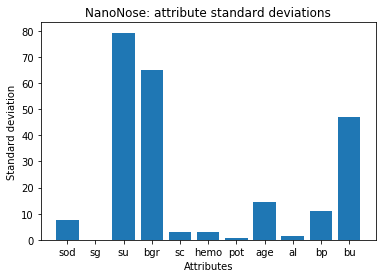

In [166]:
r = np.arange(1,X.shape[1]+1)
plt.bar(r, np.std(X_s,0))
plt.xticks(r, attributes)
plt.ylabel('Standard deviation')
plt.xlabel('Attributes')
plt.title('NanoNose: attribute standard deviations')

In [167]:
Y1=X-np.ones((N,1))*X.mean(0)

In [168]:
Y2=X-np.ones((N,1))*X.mean(0)

In [169]:
Y2=Y2*(1/np.std(Y2,0))

In [170]:
Ys=[Y1,Y2]

In [171]:
titles = ['Zero-mean', 'Zero-mean and unit variance']

In [172]:
i=0

In [173]:
j=1

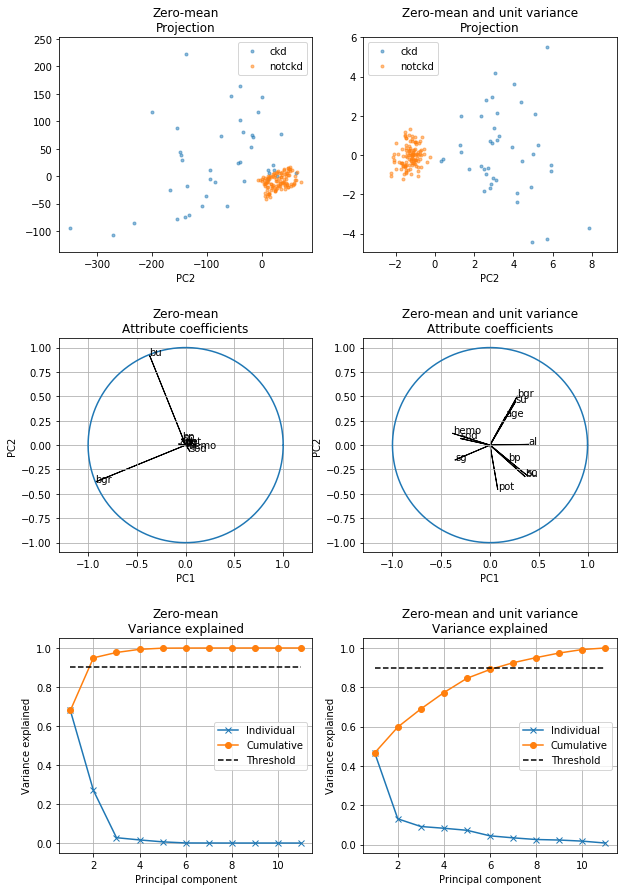

In [174]:
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=.4)
plt.title('NanoNose: Effect of standardization')
nrows=3
ncols=2
for k in range(2):
    U,S,Vh = svd(Ys[k],full_matrices=False)
    V=Vh.T
    if k==1: V=-V; U=-U;
    rho=(S*S)/(S*S).sum()
    Z=U*S;
    plt.subplot(nrows, ncols, 1+k)
    C = len(classNames)
    for c in range(C):
        plt.plot(Z[y==c,i], Z[y==c,j], '.', alpha=.5)
    plt.xlabel('PC'+str(i+1))
    plt.xlabel('PC'+str(j+1))
    plt.title(titles[k] + '\n' + 'Projection' )
    plt.legend(classNames)
    plt.axis('equal')
    
    plt.subplot(nrows, ncols,  3+k)
    for att in range(V.shape[1]):
        plt.arrow(0,0, V[att,i], V[att,j])
        plt.text(V[att,i], V[att,j], attributes[att])
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('PC'+str(j+1))
    plt.grid()
 
    plt.plot(np.cos(np.arange(0, 2*np.pi, 0.01)), 
         np.sin(np.arange(0, 2*np.pi, 0.01)));
    plt.title(titles[k] +'\n'+'Attribute coefficients')
    plt.axis('equal')
    
    plt.subplot(nrows, ncols,  5+k);
    plt.plot(range(1,len(rho)+1),rho,'x-')
    plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
    plt.plot([1,len(rho)],[threshold, threshold],'k--')
    plt.title('Variance explained by principal components');
    plt.xlabel('Principal component');
    plt.ylabel('Variance explained');
    plt.legend(['Individual','Cumulative','Threshold'])
    plt.grid()
    plt.title(titles[k]+'\n'+'Variance explained')
    
plt.show()